In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


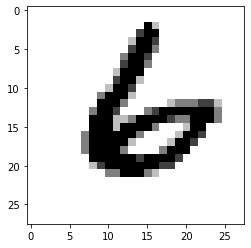

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

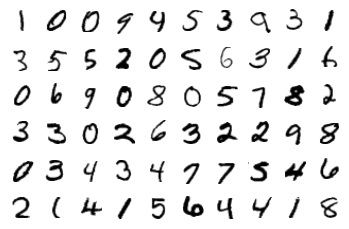

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
hidden_sizes = [30, 30, 10]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [9]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.0607e-04,  1.0607e-04,  1.0607e-04,  ...,  1.0607e-04,
          1.0607e-04,  1.0607e-04],
        [-1.8663e-03, -1.8663e-03, -1.8663e-03,  ..., -1.8663e-03,
         -1.8663e-03, -1.8663e-03],
        [-1.4288e-05, -1.4288e-05, -1.4288e-05,  ..., -1.4288e-05,
         -1.4288e-05, -1.4288e-05],
        ...,
        [ 6.2054e-04,  6.2054e-04,  6.2054e-04,  ...,  6.2054e-04,
          6.2054e-04,  6.2054e-04],
        [ 1.0669e-03,  1.0669e-03,  1.0669e-03,  ...,  1.0669e-03,
          1.0669e-03,  1.0669e-03],
        [ 4.6864e-04,  4.6864e-04,  4.6864e-04,  ...,  4.6864e-04,
          4.6864e-04,  4.6864e-04]])


In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.2440192038094058
Epoch 1 - Training loss: 0.39138605359044154
Epoch 2 - Training loss: 0.29479189263160294
Epoch 3 - Training loss: 0.24188294930498738
Epoch 4 - Training loss: 0.20908136243250833
Epoch 5 - Training loss: 0.18481380552021678
Epoch 6 - Training loss: 0.1674290538322665
Epoch 7 - Training loss: 0.15521399616234022
Epoch 8 - Training loss: 0.14749532576197627
Epoch 9 - Training loss: 0.1396128991529393
Epoch 10 - Training loss: 0.13072336610080973
Epoch 11 - Training loss: 0.12385629362531944
Epoch 12 - Training loss: 0.11912205139560296
Epoch 13 - Training loss: 0.11280761489064804
Epoch 14 - Training loss: 0.10964008704371957
Epoch 15 - Training loss: 0.10503794143456957
Epoch 16 - Training loss: 0.10221186196004578
Epoch 17 - Training loss: 0.09672435452001912
Epoch 18 - Training loss: 0.0945106100038822
Epoch 19 - Training loss: 0.0904257170044815
Epoch 20 - Training loss: 0.09018962401876858
Epoch 21 - Training loss: 0.08593368245713683
Epo

In [11]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
#view_classify(img.view(1, 28, 28), ps)
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Predicted Digit = 4
Number Of Images Tested = 10000

Model Accuracy = 0.9634


In [12]:
torch.save(model, './torch_mnist_model.pt') 

In [13]:
# OpenCL setup
import pyopencl as cl
import deviceinfo

In [14]:
# Ask the user to select a platform/device on the CLI
context = cl.create_some_context()

# Print out device info
deviceinfo.output_device_info(context.devices[0])

# Create a command queue
queue = cl.CommandQueue(context)

Device is NVIDIA GeForce GTX 1650 TiGPU from NVIDIA Corporation with a max of 16 compute units


In [15]:
params = model.state_dict()
for k,v in params.items():
    # print parameter name
    print(k,params[k].numpy().shape)
layer1_weight = params['0.weight'].numpy().reshape(-1)
layer1_bias = params['0.bias'].numpy()
layer2_weight = params['2.weight'].numpy().reshape(-1)
layer2_bias = params['2.bias'].numpy()
layer3_weight = params['4.weight'].numpy().reshape(-1)
layer3_bias = params['4.bias'].numpy()
classifier_weight = params['6.weight'].numpy().reshape(-1)
classifier_bias = params['6.bias'].numpy()
print(len(layer1_bias))
print(len(layer2_bias))
print(len(layer3_bias))
print(len(classifier_bias))

0.weight (30, 784)
0.bias (30,)
2.weight (30, 30)
2.bias (30,)
4.weight (10, 30)
4.bias (10,)
6.weight (10, 10)
6.bias (10,)
30
30
10
10


In [55]:
images, labels = next(iter(valloader))
ind=3
x_test = images[ind].view(1, 784)
h_sample = x_test.numpy().reshape(-1)
h_result_layer1 = np.empty(1 * len(layer1_bias)).astype(np.float32)
h_result_layer2 = np.empty(1 * len(layer2_bias)).astype(np.float32)
h_result_layer3 = np.empty(1 * len(layer3_bias)).astype(np.float32)
h_result_classifier = np.empty(1 * len(classifier_bias)).astype(np.float32)

# device input buffer
d_sample = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=h_sample)

# device buffers 
d_layer1_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer1_weight)
d_layer1_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer1_bias)
d_layer2_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer2_weight)
d_layer2_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer2_bias)
d_layer3_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer3_weight)
d_layer3_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer3_bias)
d_classifier_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=classifier_weight)
d_classifier_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=classifier_bias)

d_result_layer1 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer1.nbytes)
d_result_layer2 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer2.nbytes)
d_result_layer3 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer3.nbytes)
d_result_classifier = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_classifier.nbytes)

(784,)


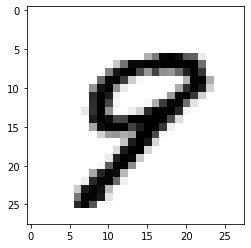

In [49]:
plt.imshow(images[ind].squeeze(), cmap='gray_r');

In [37]:
kernelSource = open("gesturenet.cl").read()
program = cl.Program(context, kernelSource).build()

In [38]:
conv3x3 = program.conv2d3x3
conv3x3.set_scalar_arg_dtypes([np.int32, np.int32, np.int32, np.int32, np.int32, np.int32, \
                               None, None, None, None])

maxpool = program.maxpool2d
maxpool.set_scalar_arg_dtypes([np.int32, np.int32, None, None])

conv1x1 = program.conv2d1x1
conv1x1.set_scalar_arg_dtypes([np.int32, np.int32, np.int32,\
                               None, None, None, None])

avgpool = program.avgpool2d
avgpool.set_scalar_arg_dtypes([np.int32,np.int32,None, None])

fc = program.fc
fc.set_scalar_arg_dtypes([np.int32,np.int32,None,None,None,None])

In [50]:
import time
rtime = time.time()
print(len(h_sample))
# First
fc(queue,(len(layer1_bias),),None,len(h_sample),1,d_sample,d_layer1_weight,d_layer1_bias,d_result_layer1)
# Second
fc(queue,(len(layer2_bias),),None,len(layer1_bias),1,d_result_layer1,d_layer2_weight,d_layer2_bias,d_result_layer2)
# Third
fc(queue,(len(layer3_bias),),None,len(layer2_bias),1,d_result_layer2,d_layer3_weight,d_layer3_bias,d_result_layer3)
# classifier
fc(queue,(len(classifier_bias),),None,len(layer3_bias),0,d_result_layer3,d_classifier_weight,d_classifier_bias,d_result_classifier)

queue.finish()
rtime = time.time() - rtime
print("The kernel ran in", rtime, "seconds")

784
The kernel ran in 0.3624410629272461 seconds


In [21]:
#copy result from gpu
cl.enqueue_copy(queue, h_result_classifier, d_result_classifier)
queue.finish()
label_opencl = np.argmax(h_result_classifier)
print('the label index prediction of OpenCL implement: %d' % label_opencl)
with torch.no_grad():
    logps = model(x_test)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
y_test=probab
correct_result = y_test
error = ((correct_result - h_result_classifier) ** 2).sum()
print('OpenCL implement error: ', error)
cl.enqueue_copy(queue, h_result_layer1, d_result_layer1)
print(h_result_layer1.shape)
cl.enqueue_copy(queue, h_result_layer2, d_result_layer2)
print(h_result_layer2.shape)
cl.enqueue_copy(queue, h_result_layer3, d_result_layer3)
print(h_result_layer3.shape)
cl.enqueue_copy(queue, h_result_classifier, d_result_classifier)
print(h_result_classifier.shape)
print(y_test)
print(h_result_classifier)

the label index prediction of OpenCL implement: 7
Predicted Digit = 7
OpenCL implement error:  1081.6711
(30,)
(30,)
(10,)
(10,)
[2.4441893e-14, 2.8292839e-06, 3.8519876e-05, 0.00019190871, 1.042864e-12, 1.4331562e-10, 9.056019e-16, 0.99976486, 2.191084e-09, 1.8612957e-06]
[-11.749711     6.8172946    9.428437    11.034285    -7.9962716
  -3.0731947  -15.045157    19.592543    -0.34609866   6.3985386 ]


In [22]:
import math
total = 0
for i in range(0,10):
    total += math.exp(h_result_classifier[i])
softlist = []
for j in range(0,10):
    softlist.append(math.log(math.exp(h_result_classifier[j])/total))

In [23]:
print(softlist)

[-31.342488833515336, -12.775483199207477, -10.164340563862018, -8.558493205158404, -27.589049407093217, -22.665972539035966, -34.63793522938936, -0.00023514851777905245, -19.938876458255937, -13.19423920735567]


In [24]:
np.argmax(softlist)

7

In [52]:
# Layer 1
lay1out = []
for i in range(0,len(layer1_bias)):
    tmp = layer1_bias[i]
    for j in range(0, len(h_sample)):
        tmp = tmp + h_sample[j]*layer1_weight[i*len(h_sample)+j]
    if tmp > 0:
        lay1out.append(tmp)
    else:
        lay1out.append(0)
print(len(lay1out))
print(lay1out)
# Layer 2
lay2out = []
for i in range(0,len(layer2_bias)):
    tmp = layer2_bias[i]
    for j in range(0, len(lay1out)):
        tmp = tmp + lay1out[j]*layer2_weight[i*len(lay1out)+j]
    if tmp > 0:
        lay2out.append(tmp)
    else:
        lay2out.append(0)
print(len(lay2out))
print(lay2out)
# Layer 3
lay3out = []
for i in range(0,len(layer3_bias)):
    tmp = layer3_bias[i]
    for j in range(0, len(lay2out)):
        tmp = tmp + lay2out[j]*layer3_weight[i*len(lay2out)+j]
    if tmp > 0:
        lay3out.append(tmp)
    else:
        lay3out.append(0)
print(len(lay3out))
print(lay3out)
# Layer 4
lay4out = []
for i in range(0,len(classifier_bias)):
    tmp = classifier_bias[i]
    for j in range(0, len(lay3out)):
        tmp = tmp + lay3out[j]*classifier_weight[i*len(lay3out)+j]
    lay4out.append(tmp)
print(len(lay4out))
print(lay4out)
# softmax
import math
total = 0
for i in range(0,10):
    total += math.exp(lay4out[i])
softlist = []
for j in range(0,10):
    softlist.append(math.log(math.exp(lay4out[j])/total))
np.argmax(softlist)

30
[2.0909262, 6.2951226, 4.4432406, 0, 0, 0, 1.1680237, 7.6632833, 7.054055, 0.3523332, 8.418092, 0.32216167, 0, 0, 0, 2.759497, 0, 1.8602476, 3.7636855, 7.5292354, 0, 0.14527993, 1.8464662, 0.5823832, 0, 0.56025344, 0, 0.61780626, 9.673123, 1.0741304]
30
[4.078382298350334, 1.275116367265582, 3.1018615975044668, 0, 1.253047259291634, 5.9403373268432915, 0, 0.940945828333497, 0, 1.5328836254775524, 3.140675271861255, 3.251567643135786, 0, 2.124031838029623, 0.6472333893179893, 0.6365174567326903, 4.190447059459984, 3.6446083458140492, 0, 5.0434326734393835, 0, 4.499081185087562, 4.8807343672961, 1.4100448489189148, 10.8815873619169, 0, 0, 1.7410281347110868, 3.165700189070776, 0]
10
[12.849501409647075, 0, 7.752305577428592, 10.244680387208327, 16.950069644797967, 1.449955738018937, 8.727709765148596, 0, 4.447069384703502, 2.4338481323046115]
10
[-9.987698702724426, 1.4780240405934677, -6.170546334487918, 8.936991053182894, 8.065529455986926, -3.2200652480502248, -24.459959402470332, 

9

In [28]:
print(h_result_layer1)

[2.8726296  1.324508   4.6516767  0.         0.         0.
 6.469658   5.240946   1.9280826  2.897212   5.9398127  4.520807
 0.         0.9104704  0.         0.         0.         0.
 0.11373059 5.248709   0.         0.         5.855176   0.
 0.         0.         0.         0.10415128 6.841526   4.845862  ]


In [29]:
print(h_result_layer2)

[2.6043942  0.         3.5089636  0.         1.4334346  2.9843714
 0.         2.6444643  1.4965739  2.213197   0.         0.
 0.         0.         1.442863   6.451102   5.7638855  2.1742241
 4.7812214  0.         0.         6.977492   0.50789505 1.9713213
 3.957841   0.         0.         0.         0.         0.        ]


In [30]:
print(h_result_layer3)

[ 0.21539801  0.          7.636201    9.754535    5.9596314   0.02257963
  5.5563254   2.3437774  14.824237    0.14258102]


In [31]:
print(h_result_classifier)

[-11.749711     6.8172946    9.428437    11.034285    -7.9962716
  -3.0731947  -15.045157    19.592543    -0.34609866   6.3985386 ]
